In [1]:
from GraphModels.model import *
from GraphModels.solvers import *
from GraphModels.metrics import *
import networkx as nx
import matplotlib.pyplot as plt
import random
from experiments import *

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

In [2]:
def f(x, a, b, c):
    return a * np.power(x, b) + c

params = curve_fit(f, np.arange(0.1, 1, 0.1), [0.94, 0.87, 0.85, 0.77, 0.74, 0.68, 0.64, 0.55, 0.4])[0]

In [3]:
N = 20
n = 40
S_exp = 1
S_obs = 1

In [11]:
data = np.stack([familywise_MHT_experiments(CholCorrModel, MHTSolver(0.05, corr_pvalues), N, f(density, *params), n, S_exp, S_obs, metrics=[TP, FP, FN, TN, FDR], verbose=True) for density in np.arange(0.1, 1, 0.1)])

Family-wise MHT experiment with 0.9129577140654433 completed in time: 0.27718553101294674s
Family-wise MHT experiment with 0.8871659686895388 completed in time: 0.27098064197343774s
Family-wise MHT experiment with 0.8498653489066507 completed in time: 0.24618988399743102s
Family-wise MHT experiment with 0.8023487069225598 completed in time: 0.20436418801546097s
Family-wise MHT experiment with 0.7454280089504388 completed in time: 0.2239791420288384s
Family-wise MHT experiment with 0.6796840176552937 completed in time: 0.21531084898742847s
Family-wise MHT experiment with 0.6055629005578713 completed in time: 0.2751174059812911s
Family-wise MHT experiment with 0.5234235008615121 completed in time: 0.22865753900259733s
Family-wise MHT experiment with 0.4335638331297838 completed in time: 0.29522149299737066s


In [12]:
data.shape

(9, 5, 5)

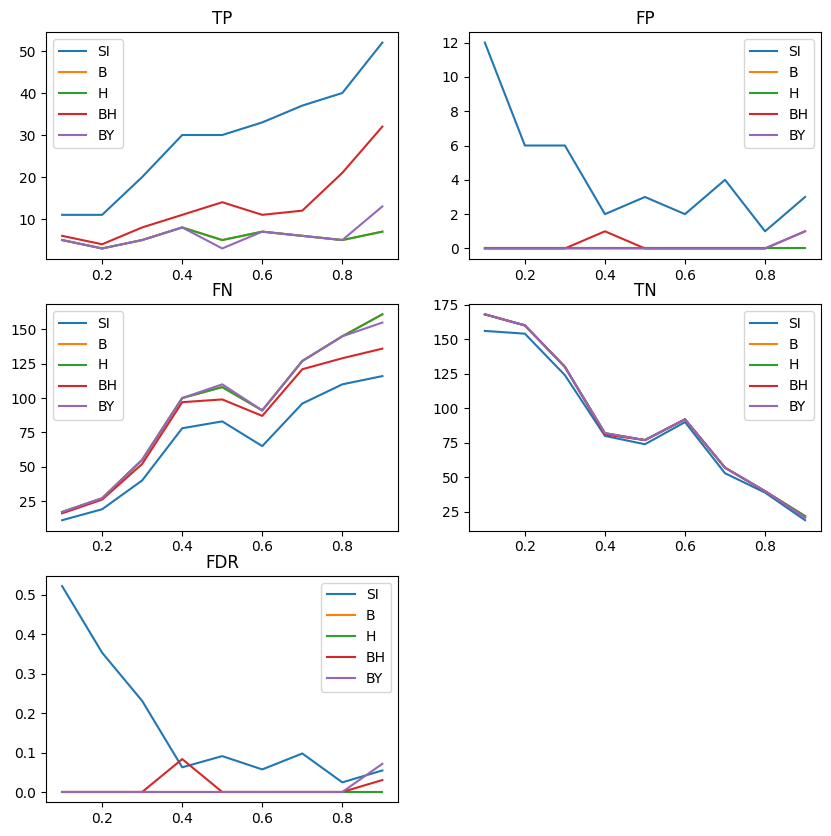

In [14]:
for i, metric in enumerate(['TP', 'FP', 'FN', 'TN', 'FDR']):
    plt.subplot(3, 2, i+1)
    for idx, algo in enumerate(['SI', 'B', 'H', 'BH', 'BY']):
        plt.plot(np.arange(0.1, 1, 0.1), data[:, i, idx], label=algo)
    plt.title(metric)
    plt.legend()
    
plt.gcf().set_size_inches(10, 10)